<a href="https://colab.research.google.com/github/ashrafabuareesh/Homes-in-Ames/blob/main/Homes_in_Ames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real estate price forecasting

## Project Overview

 We've been hired by a group of homeowners concerned about their homes' value decreasing before they sell them. They have asked us to take the raw house price data from their hometown, Ames, Iowa to give them data-driven recommendations on how to increase the value of their home.


 - goal is: Increase the resale value of homes.
Homeowners can make more informed decisions about renovations and upgrades based on predicted future trends in housing prices. They can prioritize renovations that are likely to yield the highest returns on investment, thereby increasing the overall value of their homes

## Load and Inspect Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive1")

Drive already mounted at /content/drive1; to attempt to forcibly remount, call drive.mount("/content/drive1", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive1/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/ames-housing-dojo.csv")
df.head()

,Unnamed: 0,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Unf SF,Total Bsmt SF,Central Air,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,TotRms AbvGrd,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
0,0,907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864sqft,0.0,0.0,1,0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,03-2006,119900.0
1,1,527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462sqft,1.0,0.0,2,1,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,03-2006,320000.0
2,2,534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958sqft,0.0,0.0,1,0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,04-2007,151500.0
3,3,528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084sqft,1.0,0.0,2,0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,06-2008,385000.0
4,4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565sqft,1.0,0.0,2,0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,02-2007,193800.0


In [ ]:
pd.get_option("display.max_columns") # الحد الاقصى لعدد الاعمدة الي ممكن تبين في pandas

100

In [ ]:
pd.set_option("display.max_columns",100)

In [ ]:
df.head()

,Unnamed: 0,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Unf SF,Total Bsmt SF,Central Air,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,TotRms AbvGrd,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
0,0,907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864sqft,0.0,0.0,1,0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,03-2006,119900.0
1,1,527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462sqft,1.0,0.0,2,1,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,03-2006,320000.0
2,2,534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958sqft,0.0,0.0,1,0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,04-2007,151500.0
3,3,528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084sqft,1.0,0.0,2,0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,06-2008,385000.0
4,4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565sqft,1.0,0.0,2,0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,02-2007,193800.0


In [ ]:
df.tail(10)

,Unnamed: 0,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Unf SF,Total Bsmt SF,Central Air,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,TotRms AbvGrd,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
2949,2949,528228280,RL,43,3087,Pave,NaN,AllPub,Blmngtn,TwnhsE,1Story,7,5,2006,2006,Gd,TA,767.0,1220.0,Y,1364sqft,1.0,0.0,2,0,2,1,6,Attchd,2006.0,2.0,437.0,TA,TA,Y,NaN,11-2006,210250.0
2950,2950,528112010,RL,108,12228,Pave,NaN,AllPub,NridgHt,1Fam,1Story,7,5,2006,2006,Gd,TA,1721.0,1721.0,Y,1740sqft,0.0,0.0,2,0,4,1,8,Attchd,2006.0,3.0,874.0,TA,TA,Y,NaN,09-2006,293000.0
2951,2951,535377090,RL,64,6979,Pave,NaN,AllPub,OldTown,Duplex,SFoyer,6,5,1980,1980,TA,TA,0.0,1056.0,Y,1056sqft,2.0,0.0,0,0,0,2,4,Detchd,1980.0,2.0,576.0,TA,TA,Y,GdPrv,06-2010,144000.0
2952,2952,908102040,RL,67,8777,Pave,NaN,AllPub,Edwards,Duplex,1.5Fin,5,7,1900,2003,TA,TA,188.0,1272.0,Y,2200sqft,2.0,0.0,2,2,4,2,9,NaN,NaN,0.0,0.0,NaN,NaN,N,GdPrv,09-2008,145900.0
2953,2953,535150300,RL,174,25419,Pave,NaN,AllPub,NAmes,1Fam,2Story,8,4,1918,1990,Gd,Gd,140.0,1360.0,Y,3112sqft,1.0,1.0,2,0,4,1,8,Detchd,1918.0,2.0,795.0,TA,TA,Y,GdPrv,03-2006,235000.0
2954,2954,903400030,RL,50,11672,Pave,Pave,AllPub,BrkSide,1Fam,1Story,5,5,1925,1950,TA,TA,816.0,816.0,Y,816sqft,0.0,0.0,1,0,2,1,4,Detchd,1925.0,1.0,210.0,Fa,Fa,N,NaN,07-2006,109000.0
2955,2955,533234020,FV,79,10646,Pave,NaN,AllPub,Somerst,1Fam,2Story,7,5,2001,2001,TA,TA,177.0,858.0,Y,1789sqft,1.0,0.0,2,1,3,1,7,Attchd,2001.0,2.0,546.0,TA,TA,Y,NaN,06-2008,223000.0
2956,2956,908188140,RM,24,2522,Pave,NaN,AllPub,Edwards,Twnhs,2Story,7,5,2004,2004,Gd,TA,970.0,970.0,Y,1709sqft,0.0,0.0,2,0,3,1,7,Detchd,2004.0,2.0,380.0,TA,TA,Y,NaN,04-2006,137500.0
2957,2957,909254050,RL,54,7609,Pave,NaN,AllPub,Crawfor,1Fam,2Story,8,9,1925,1997,Gd,Gd,392.0,798.0,Y,1512sqft,1.0,0.0,2,0,3,1,7,Detchd,1925.0,1.0,180.0,TA,TA,P,GdPrv,06-2008,231000.0
2958,2958,902201120,RM,50,6000,Pave,NaN,AllPub,OldTown,1Fam,1Story,5,5,1948,1950,TA,TA,516.0,789.0,Y,789sqft,0.0,0.0,1,0,2,1,5,Detchd,1948.0,1.0,250.0,TA,TA,Y,NaN,04-2008,2000000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2959 non-null   int64  
 1   PID             2959 non-null   int64  
 2   MS Zoning       2959 non-null   object 
 3   Lot Frontage    2959 non-null   int64  
 4   Lot Area        2959 non-null   int64  
 5   Street          2959 non-null   object 
 6   Alley           201 non-null    object 
 7   Utilities       2959 non-null   object 
 8   Neighborhood    2959 non-null   object 
 9   Bldg Type       2959 non-null   object 
 10  House Style     2959 non-null   object 
 11  Overall Qual    2959 non-null   int64  
 12  Overall Cond    2959 non-null   int64  
 13  Year Built      2959 non-null   int64  
 14  Year Remod/Add  2959 non-null   int64  
 15  Exter Qual      2959 non-null   object 
 16  Exter Cond      2959 non-null   object 
 17  Bsmt Unf SF     2958 non-null   f

In [ ]:
df.shape
df.dtypes
len(df)
len(df.columns)
df.shape

(2959, 38)

In [ ]:
df['Gr Liv Area']=df['Gr Liv Area'].str.replace('sqft','')
df['Gr Liv Area']=df['Gr Liv Area'].astype(float)
df['Gr Liv Area'].dtype

dtype('float64')

In [ ]:
df=df.drop(columns= ['Unnamed: 0'])
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Unf SF,Total Bsmt SF,Central Air,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,TotRms AbvGrd,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
0,907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,0.0,0.0,1,0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,03-2006,119900.0
1,527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,1.0,0.0,2,1,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,03-2006,320000.0
2,534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,0.0,0.0,1,0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,04-2007,151500.0
3,528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,1.0,0.0,2,0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,06-2008,385000.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,1.0,0.0,2,0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,02-2007,193800.0


In [ ]:
# Create a dictionary using old column name : new column name format
rename_dict = {"Year Remod/Add":"Year Remodeled",
               "Bsmt Unf SF": "Bsmt Unf Sqft",
               "Total Bsmt SF": "Total Bsmnt Sqft",
               "TotRms AbvGrd": "Total Rooms",
               "Gr Liv Area":"Living Area Sqft"}
rename_dict



{'Year Remod/Add': 'Year Remodeled',
 'Bsmt Unf SF': 'Bsmt Unf Sqft',
 'Total Bsmt SF': 'Total Bsmnt Sqft',
 'TotRms AbvGrd': 'Total Rooms',
 'Gr Liv Area': 'Living Area Sqft'}

In [ ]:
df=df.rename(rename_dict,axis=1)
df

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
0,907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,0.0,0.0,1,0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,03-2006,119900.0
1,527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,1.0,0.0,2,1,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,03-2006,320000.0
2,534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,0.0,0.0,1,0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,04-2007,151500.0
3,528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,1.0,0.0,2,0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,06-2008,385000.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,1.0,0.0,2,0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,02-2007,193800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,903400030,RL,50,11672,Pave,Pave,AllPub,BrkSide,1Fam,1Story,5,5,1925,1950,TA,TA,816.0,816.0,Y,816.0,0.0,0.0,1,0,2,1,4,Detchd,1925.0,1.0,210.0,Fa,Fa,N,NaN,07-2006,109000.0
2955,533234020,FV,79,10646,Pave,NaN,AllPub,Somerst,1Fam,2Story,7,5,2001,2001,TA,TA,177.0,858.0,Y,1789.0,1.0,0.0,2,1,3,1,7,Attchd,2001.0,2.0,546.0,TA,TA,Y,NaN,06-2008,223000.0
2956,908188140,RM,24,2522,Pave,NaN,AllPub,Edwards,Twnhs,2Story,7,5,2004,2004,Gd,TA,970.0,970.0,Y,1709.0,0.0,0.0,2,0,3,1,7,Detchd,2004.0,2.0,380.0,TA,TA,Y,NaN,04-2006,137500.0
2957,909254050,RL,54,7609,Pave,NaN,AllPub,Crawfor,1Fam,2Story,8,9,1925,1997,Gd,Gd,392.0,798.0,Y,1512.0,1.0,0.0,2,0,3,1,7,Detchd,1925.0,1.0,180.0,TA,TA,P,GdPrv,06-2008,231000.0


In [ ]:
duplicated_row=df.duplicated (keep=False)
duplicated_row.sum()
df[duplicated_row].sort_values('PID')

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
290,526351010,RL,81,14267,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,6,1958,1958,TA,TA,406.0,1329.0,Y,1329.0,0.0,0.0,1,1,3,1,6,Attchd,1958.0,1.0,312.0,TA,TA,Y,NaN,06-2010,172000.0
2029,526351010,RL,81,14267,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,6,1958,1958,TA,TA,406.0,1329.0,Y,1329.0,0.0,0.0,1,1,3,1,6,Attchd,1958.0,1.0,312.0,TA,TA,Y,NaN,06-2010,172000.0
1100,528174020,RL,34,3901,Pave,NaN,AllPub,NridgHt,Twnhs,1Story,6,5,2005,2006,Gd,TA,436.0,1302.0,Y,1302.0,1.0,0.0,1,1,1,1,5,Attchd,2005.0,2.0,631.0,TA,TA,Y,NaN,08-2007,204000.0
2552,528174020,RL,34,3901,Pave,NaN,AllPub,NridgHt,Twnhs,1Story,6,5,2005,2006,Gd,TA,436.0,1302.0,Y,1302.0,1.0,0.0,1,1,1,1,5,Attchd,2005.0,2.0,631.0,TA,TA,Y,NaN,08-2007,204000.0
524,535153150,RL,76,9120,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,6,1958,1958,TA,TA,599.0,1261.0,Y,1261.0,1.0,0.0,1,0,3,1,6,Attchd,1958.0,2.0,433.0,TA,TA,Y,NaN,11-2008,163000.0
869,535153150,RL,76,9120,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,6,1958,1958,TA,TA,599.0,1261.0,Y,1261.0,1.0,0.0,1,0,3,1,6,Attchd,1958.0,2.0,433.0,TA,TA,Y,NaN,11-2008,163000.0
1943,907262070,RL,72,7226,Pave,NaN,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,Gd,TA,798.0,798.0,Y,1640.0,0.0,0.0,2,1,3,1,6,Attchd,2003.0,2.0,595.0,TA,TA,Y,NaN,06-2008,183000.0
2306,907262070,RL,72,7226,Pave,NaN,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,Gd,TA,798.0,798.0,Y,1640.0,0.0,0.0,2,1,3,1,6,Attchd,2003.0,2.0,595.0,TA,TA,Y,NaN,06-2008,183000.0
1577,908103280,RL,65,6500,Pave,NaN,AllPub,Edwards,1Fam,1Story,6,6,1976,1976,TA,TA,94.0,1127.0,Y,1127.0,0.0,1.0,1,1,3,1,6,Detchd,1991.0,2.0,480.0,TA,TA,Y,NaN,05-2008,135000.0
1867,908103280,RL,65,6500,Pave,NaN,AllPub,Edwards,1Fam,1Story,6,6,1976,1976,TA,TA,94.0,1127.0,Y,1127.0,0.0,1.0,1,1,3,1,6,Detchd,1991.0,2.0,480.0,TA,TA,Y,NaN,05-2008,135000.0


In [ ]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()



0

In [ ]:
df.nunique() #فريد

PID                 2930
MS Zoning              7
Lot Frontage         129
Lot Area            1960
Street                 2
Alley                  2
Utilities              3
Neighborhood          28
Bldg Type              5
House Style            8
Overall Qual          10
Overall Cond           9
Year Built           118
Year Remodeled        61
Exter Qual             4
Exter Cond             5
Bsmt Unf Sqft       1137
Total Bsmnt Sqft    1058
Central Air            4
Living Area Sqft    1292
Bsmt Full Bath         4
Bsmt Half Bath         3
Full Bath              5
Half Bath              4
Bedroom                8
Kitchen                4
Total Rooms           14
Garage Type            6
Garage Yr Blt        103
Garage Cars            6
Garage Area          603
Garage Qual            5
Garage Cond            5
Paved Drive            3
Fence                  4
Date Sold             55
SalePrice           1033
dtype: int64

In [ ]:
df.nunique()/len(df)*100



PID                 99.254743
MS Zoning            0.237127
Lot Frontage         4.369919
Lot Area            66.395664
Street               0.067751
Alley                0.067751
Utilities            0.101626
Neighborhood         0.948509
Bldg Type            0.169377
House Style          0.271003
Overall Qual         0.338753
Overall Cond         0.304878
Year Built           3.997290
Year Remodeled       2.066396
Exter Qual           0.135501
Exter Cond           0.169377
Bsmt Unf Sqft       38.516260
Total Bsmnt Sqft    35.840108
Central Air          0.135501
Living Area Sqft    43.766938
Bsmt Full Bath       0.135501
Bsmt Half Bath       0.101626
Full Bath            0.169377
Half Bath            0.135501
Bedroom              0.271003
Kitchen              0.135501
Total Rooms          0.474255
Garage Type          0.203252
Garage Yr Blt        3.489160
Garage Cars          0.203252
Garage Area         20.426829
Garage Qual          0.169377
Garage Cond          0.169377
Paved Driv

In [ ]:
# How many rows are duplicates (including the first occurence)
duplicated_pids = df.duplicated(subset=['PID'], keep=False)
duplicated_pids.sum()



44

In [ ]:
df[duplicated_pids].sort_values('PID')

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
2654,526355080,RL,75,13860,Pave,NaN,AllPub,NAmes,1Fam,SLvl,8,7,1972,1995,Gd,TA,542.0,1952.0,Y,2704.0,1.0,0.0,2,1,4,1,9,Attchd,1972.0,2.0,538.0,TA,TA,Y,MnPrv,07-2009,NaN
1650,526355080,RL,75,13860,Pave,NaN,AllPub,NAmes,1Fam,SLvl,8,7,1972,1995,Gd,TA,542.0,1952.0,Y,2704.0,1.0,0.0,2,1,4,1,9,Attchd,1972.0,2.0,538.0,TA,TA,Y,MnPrv,07-2009,345000.0
135,527110020,RL,-1,8530,Pave,NaN,AllPub,Gilbert,1Fam,SLvl,7,5,1995,1996,TA,TA,384.0,384.0,Y,1474.0,0.0,0.0,2,1,3,1,7,BuiltIn,1995.0,2.0,400.0,TA,TA,Y,NaN,05-2009,168500.0
2469,527110020,RL,-1,8530,Pave,NaN,AllPub,Gilbert,1Fam,SLvl,7,5,1995,1996,TA,TA,384.0,384.0,Y,1474.0,0.0,0.0,2,1,3,1,7,BuiltIn,1995.0,2.0,400.0,TA,TA,Y,NaN,05-2009,NaN
626,527326040,RL,85,11900,Pave,NaN,AllPub,NWAmes,1Fam,1Story,7,5,1977,1977,TA,Gd,564.0,1386.0,Y,1411.0,0.0,0.0,2,0,3,1,6,Attchd,1977.0,2.0,544.0,TA,TA,Y,NaN,04-2009,82500.0
625,527326040,RL,85,11900,Pave,NaN,AllPub,NWAmes,1Fam,1Story,7,5,1977,1977,TA,Gd,564.0,1386.0,Y,1411.0,0.0,0.0,2,0,3,1,6,Attchd,1977.0,2.0,544.0,TA,TA,Y,NaN,04-2009,NaN
2341,528178070,RL,130,16900,Pave,NaN,AllPub,NridgHt,1Fam,2Story,8,5,2001,2002,Gd,TA,404.0,1479.0,Y,2649.0,1.0,0.0,2,1,4,1,10,Attchd,2001.0,3.0,746.0,TA,TA,Y,NaN,01-2008,421250.0
929,528178070,RL,130,16900,Pave,NaN,AllPub,NridgHt,1Fam,2Story,8,5,2001,2002,Gd,TA,404.0,1479.0,Y,2649.0,1.0,0.0,2,1,4,1,10,Attchd,2001.0,3.0,746.0,TA,TA,Y,NaN,01-2008,NaN
2599,528429100,RL,49,15218,Pave,NaN,AllPub,Somerst,1Fam,1Story,8,5,2006,2006,Gd,TA,108.0,1670.0,Y,1670.0,1.0,0.0,2,1,2,1,6,Attchd,2006.0,3.0,928.0,TA,TA,Y,NaN,09-2006,336820.0
324,528429100,RL,49,15218,Pave,NaN,AllPub,Somerst,1Fam,1Story,8,5,2006,2006,Gd,TA,108.0,1670.0,Y,1670.0,1.0,0.0,2,1,2,1,6,Attchd,2006.0,3.0,928.0,TA,TA,Y,NaN,09-2006,NaN


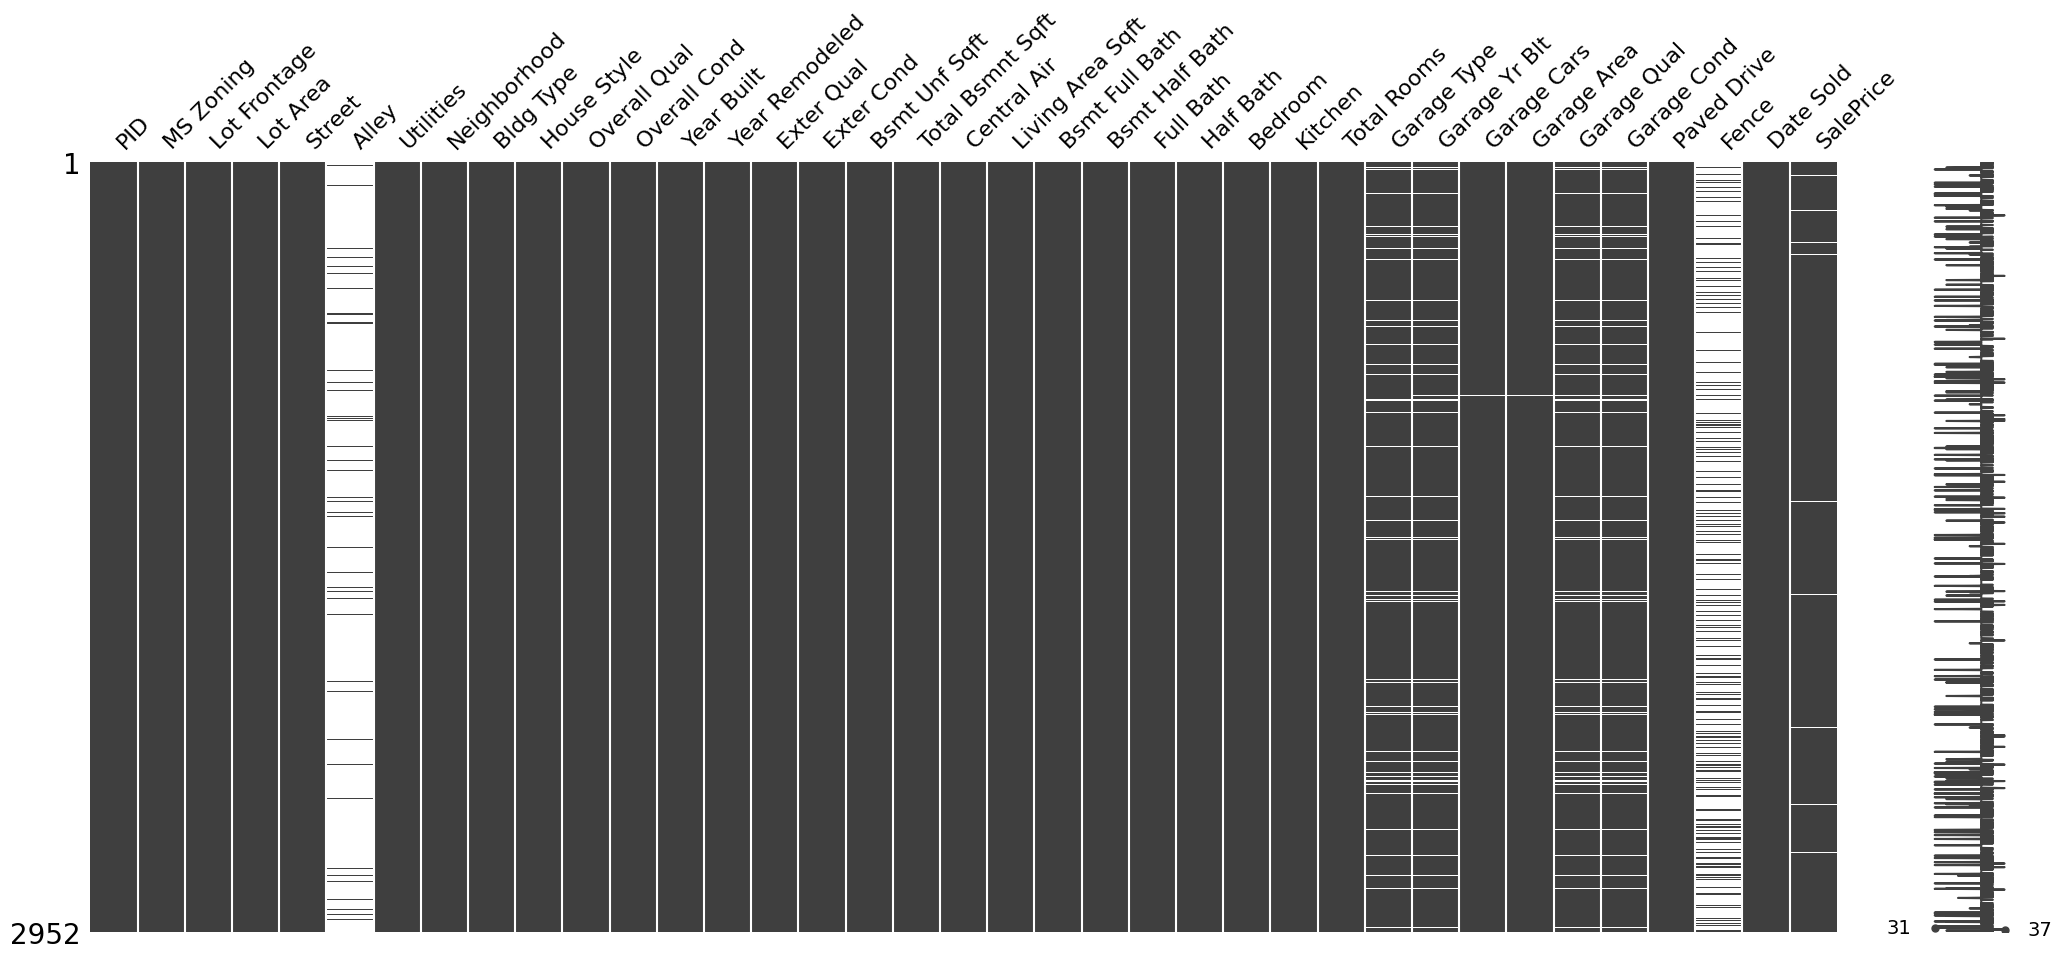

In [ ]:
import missingno  as msno
msno.matrix(df);

In [ ]:
df.nunique()/len(df)*100

PID                 99.254743
MS Zoning            0.237127
Lot Frontage         4.369919
Lot Area            66.395664
Street               0.067751
Alley                0.067751
Utilities            0.101626
Neighborhood         0.948509
Bldg Type            0.169377
House Style          0.271003
Overall Qual         0.338753
Overall Cond         0.304878
Year Built           3.997290
Year Remodeled       2.066396
Exter Qual           0.135501
Exter Cond           0.169377
Bsmt Unf Sqft       38.516260
Total Bsmnt Sqft    35.840108
Central Air          0.135501
Living Area Sqft    43.766938
Bsmt Full Bath       0.135501
Bsmt Half Bath       0.101626
Full Bath            0.169377
Half Bath            0.135501
Bedroom              0.271003
Kitchen              0.135501
Total Rooms          0.474255
Garage Type          0.203252
Garage Yr Blt        3.489160
Garage Cars          0.203252
Garage Area         20.426829
Garage Qual          0.169377
Garage Cond          0.169377
Paved Driv

In [ ]:
df.isna().sum()

PID                    0
MS Zoning              0
Lot Frontage           0
Lot Area               0
Street                 0
Alley               2751
Utilities              0
Neighborhood           0
Bldg Type              0
House Style            0
Overall Qual           0
Overall Cond           0
Year Built             0
Year Remodeled         0
Exter Qual             0
Exter Cond             0
Bsmt Unf Sqft          1
Total Bsmnt Sqft       1
Central Air            0
Living Area Sqft       0
Bsmt Full Bath         2
Bsmt Half Bath         2
Full Bath              0
Half Bath              0
Bedroom                0
Kitchen                0
Total Rooms            0
Garage Type          157
Garage Yr Blt        159
Garage Cars            1
Garage Area            1
Garage Qual          159
Garage Cond          159
Paved Drive            0
Fence               2378
Date Sold              0
SalePrice             22
dtype: int64

In [ ]:
# Dropping Null values from SalePrice
df=df.dropna(subset=["SalePrice"])

df
df['SalePrice'].isna().sum()

0

In [ ]:
df.duplicated(subset=['PID'],keep=False) .sum()

0

In [ ]:
df['PID'].nunique()/len(df)*100

100.0

In [ ]:
df=df.set_index('PID')
df

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,0.0,0.0,1,0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,03-2006,119900.0
527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,1.0,0.0,2,1,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,03-2006,320000.0
534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,0.0,0.0,1,0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,04-2007,151500.0
528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,1.0,0.0,2,0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,06-2008,385000.0
533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,1.0,0.0,2,0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,02-2007,193800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903400030,RL,50,11672,Pave,Pave,AllPub,BrkSide,1Fam,1Story,5,5,1925,1950,TA,TA,816.0,816.0,Y,816.0,0.0,0.0,1,0,2,1,4,Detchd,1925.0,1.0,210.0,Fa,Fa,N,NaN,07-2006,109000.0
533234020,FV,79,10646,Pave,NaN,AllPub,Somerst,1Fam,2Story,7,5,2001,2001,TA,TA,177.0,858.0,Y,1789.0,1.0,0.0,2,1,3,1,7,Attchd,2001.0,2.0,546.0,TA,TA,Y,NaN,06-2008,223000.0
908188140,RM,24,2522,Pave,NaN,AllPub,Edwards,Twnhs,2Story,7,5,2004,2004,Gd,TA,970.0,970.0,Y,1709.0,0.0,0.0,2,0,3,1,7,Detchd,2004.0,2.0,380.0,TA,TA,Y,NaN,04-2006,137500.0


In [ ]:
cat_col=df.select_dtypes('object').columns
cat_col

Index(['MS Zoning', 'Street', 'Alley', 'Utilities', 'Neighborhood',
       'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond', 'Central Air',
       'Half Bath', 'Garage Type', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Fence', 'Date Sold'],
      dtype='object')

In [ ]:
num_col=df.select_dtypes('number').columns
df[num_col].isna().sum()


Lot Frontage          0
Lot Area              0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remodeled        0
Bsmt Unf Sqft         1
Total Bsmnt Sqft      1
Living Area Sqft      0
Bsmt Full Bath        2
Bsmt Half Bath        2
Full Bath             0
Bedroom               0
Kitchen               0
Total Rooms           0
Garage Yr Blt       159
Garage Cars           1
Garage Area           1
SalePrice             0
dtype: int64

In [ ]:
import numpy as np
df['Garage Yr Blt'].describe()
# checking the rows with 2207 for Garage Yr Built
df[df['Garage Yr Blt'] == 2207]
df.loc[916384070,'Garage Yr Blt'] = np.nan
#df['Garage Yr Blt'].describe()
#df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(-1)
#df['Garage Yr Blt'].describe()







In [ ]:
description=df[num_col].describe()
description.loc[['min','25%','75%','max']]


,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remodeled,Bsmt Unf Sqft,Total Bsmnt Sqft,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Bedroom,Kitchen,Total Rooms,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
min,-1.0,1300.00,1.0,1.0,1872.0,1950.0,0.0,0.0,334.00,0.0,0.0,0.0,0.0,0.0,2.0,1895.0,0.0,0.0,12789.0
25%,43.0,7440.25,5.0,5.0,1954.0,1965.0,219.0,793.0,1126.00,0.0,0.0,1.0,2.0,1.0,5.0,1960.0,1.0,320.0,129500.0
75%,78.0,11555.25,7.0,6.0,2001.0,2004.0,802.0,1302.0,1742.75,1.0,0.0,2.0,3.0,1.0,7.0,2002.0,2.0,576.0,213500.0
max,313.0,215245.00,10.0,9.0,2010.0,2010.0,2336.0,6110.0,5642.00,3.0,2.0,4.0,8.0,3.0,15.0,2010.0,5.0,1488.0,2000000.0


In [ ]:
df['Lot Frontage'].describe()

count    2930.000000
mean       57.480546
std        33.788163
min        -1.000000
25%        43.000000
50%        63.000000
75%        78.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [ ]:
# Visualze expensive home (SalePrice >= 2 million)
filter_high_price = df['SalePrice'] >= 2_000_000
df[filter_high_price]


,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
902201120,RM,50,6000,Pave,NaN,AllPub,OldTown,1Fam,1Story,5,5,1948,1950,TA,TA,516.0,789.0,Y,789.0,0.0,0.0,1,0,2,1,5,Detchd,1948.0,1.0,250.0,TA,TA,Y,NaN,04-2008,2000000.0


In [ ]:
df.loc[filter_high_price,'SalePrice'] = 200_000
df['SalePrice'].describe()

count      2930.000000
mean     180825.070307
std       79878.223965
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
df['Central Air']=df['Central Air'].replace({"yes":"Y","no":"N"})
df['Central Air'].value_counts()

Y    2734
N     196
Name: Central Air, dtype: int64

In [ ]:
df['Date Sold'].head()

PID
907227090    03-2006
527108010    03-2006
534275170    04-2007
528104050    06-2008
533206070    02-2007
Name: Date Sold, dtype: object

In [ ]:
 df[['Month','Year']]= df['Date Sold'].str.split('-' , expand= True)
 df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice,Month,Year
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,0.0,0.0,1,0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,03-2006,119900.0,03,2006
527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,1.0,0.0,2,1,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,03-2006,320000.0,03,2006
534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,0.0,0.0,1,0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,04-2007,151500.0,04,2007
528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,1.0,0.0,2,0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,06-2008,385000.0,06,2008
533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,1.0,0.0,2,0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,02-2007,193800.0,02,2007


In [ ]:

# Dropping original date sold column
df = df.drop(columns=['Date Sold'])


In [ ]:
# Add values from two columns to create a new column
df['Total Full Baths'] = df['Full Bath'] + df['Bsmt Full Bath']
df['Total Full Baths'].head()

PID
907227090    1.0
527108010    3.0
534275170    1.0
528104050    3.0
533206070    3.0
Name: Total Full Baths, dtype: float64

In [ ]:
# Drop the original columns
df = df.drop(columns=['Full Bath', 'Bsmt Full Bath'])
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Half Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,0.0,0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,03,2006,1.0
527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,0.0,1,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,320000.0,03,2006,3.0
534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,0.0,0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,151500.0,04,2007,1.0
528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,0.0,0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,385000.0,06,2008,3.0
533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,0.0,0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,193800.0,02,2007,3.0


In [ ]:
# Add values from two columns to create a new column
filtter_2=df['Half Bath']=="?"
df.loc[filtter_2,'Half Bath']=np.nan
df['Half Bath'].value_counts()

0    1841
1    1061
2      25
Name: Half Bath, dtype: int64

In [ ]:
df['Half Bath']=df['Half Bath'].astype(float)

In [ ]:
# Add values from two columns to create a new column
df['Total Half Baths'] = df['Half Bath'] + df['Bsmt Half Bath']
df['Total Half Baths'].value_counts()

0.0    1706
1.0    1154
2.0      61
3.0       3
4.0       1
Name: Total Half Baths, dtype: int64

In [ ]:
# Drop the original columns
df = df.drop(columns=['Half Bath', 'Bsmt Half Bath'])
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,03,2006,1.0,0.0
527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,320000.0,03,2006,3.0,1.0
534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,151500.0,04,2007,1.0,0.0
528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,385000.0,06,2008,3.0,0.0
533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,193800.0,02,2007,3.0,0.0


In [ ]:
fpath_out="/content/drive1/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/ames-housing_clean2.csv"
df.to_csv(fpath_out,index=True)

## Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Home Prices')

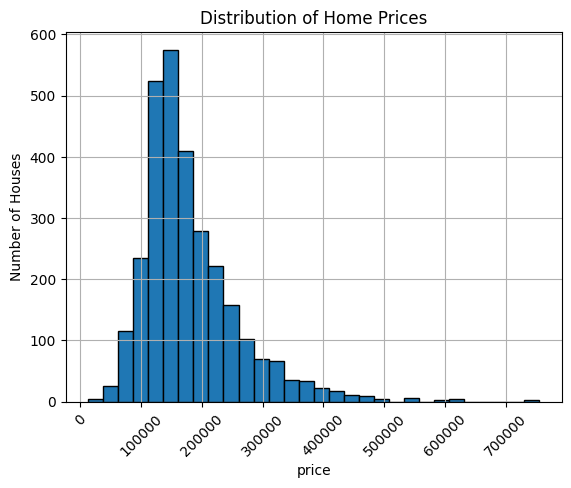

In [ ]:
ax=df['SalePrice'].hist(bins=30,edgecolor="black")
ax.ticklabel_format(style='plain')    # عشان اشيل الترميز العلمي في الصورة
ax.tick_params(axis='x',rotation=45)
ax.set_xlabel ("price")
ax.set_ylabel("Number of Houses")
ax.set_title('Distribution of Home Prices')


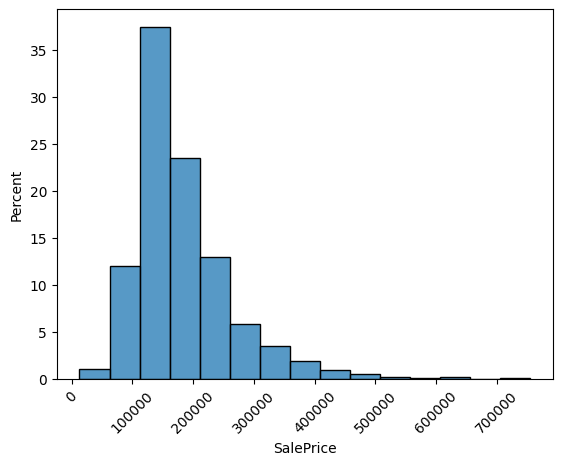

In [ ]:
ax=sns.histplot(data=df,x="SalePrice" ,binwidth=50_000,stat='percent')
ax.ticklabel_format(style='plain')
ax.tick_params(axis='x', rotation = 45);

{'whiskers': [<matplotlib.lines.Line2D at 0x7e45982f9b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7e45982fbc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e45982fa620>],
 'medians': [<matplotlib.lines.Line2D at 0x7e45982fb100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e4598612d40>],
 'means': []}

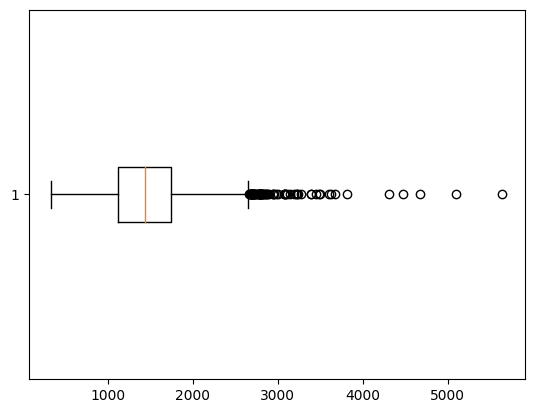

In [ ]:
fig,ax=plt.subplots()
data=df['Living Area Sqft']
ax.boxplot(data,vert=False)

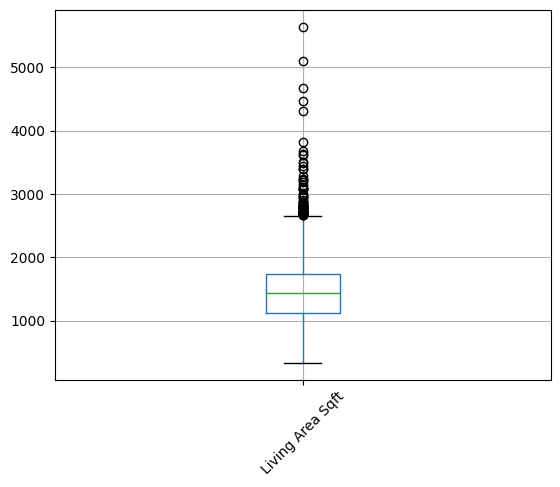

In [ ]:
ax=df.boxplot('Living Area Sqft',rot=45 )

Text(0.5, 1.1, 'sdal;mkasdasd')

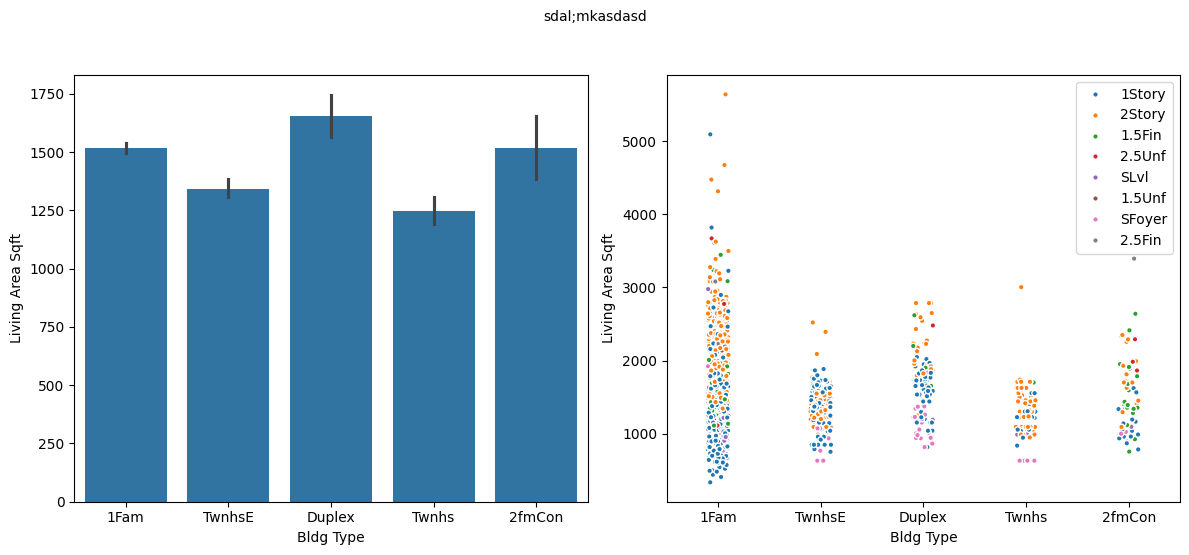

In [ ]:

fig , axes = plt.subplots(ncols=2,figsize=(12,5))
axes[0]= sns.barplot(data=df,x="Bldg Type",y="Living Area Sqft" ,ax=axes[0] )
axes[1]=sns.stripplot(data=df,x="Bldg Type",y="Living Area Sqft" ,ax=axes[1],s=4,edgecolor="white",hue="House Style",linewidth=1)
axes[1].legend(loc=1)
fig.tight_layout()
fig.suptitle("sdal;mkasdasd", fontsize=10,y=1.1,)

In [ ]:
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,03,2006,1.0,0.0
527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,320000.0,03,2006,3.0,1.0
534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,151500.0,04,2007,1.0,0.0
528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,385000.0,06,2008,3.0,0.0
533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,193800.0,02,2007,3.0,0.0


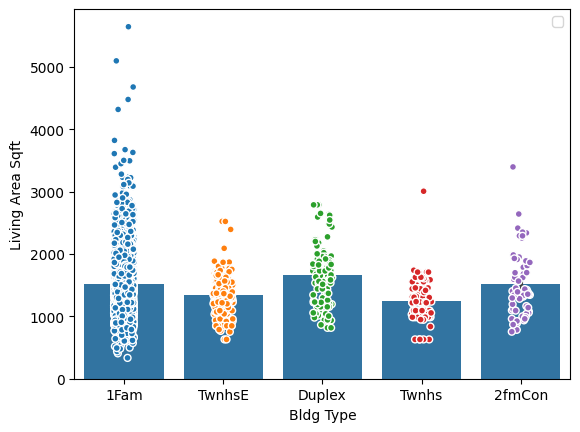

In [ ]:
# Combine a barplot and a stripplot
ax = sns.barplot(data=df, x='Bldg Type', y='Living Area Sqft')
sns.stripplot(data=df, x='Bldg Type', y='Living Area Sqft',ax=ax,
                   hue='Bldg Type', edgecolor='white', linewidth=1);
ax.legend(loc=1)


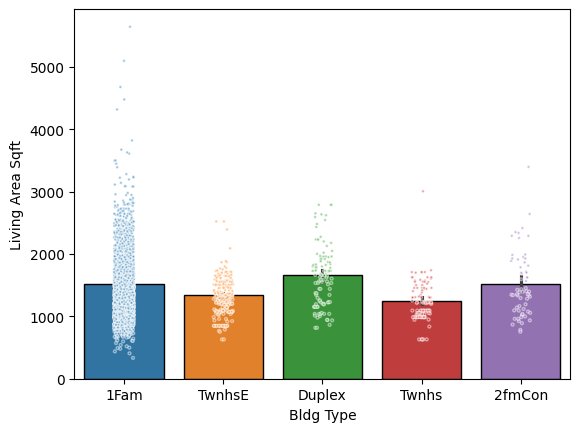

In [ ]:
ax = sns.barplot(data=df, x='Bldg Type', y='Living Area Sqft' ,edgecolor="black",hue='Bldg Type')
sns.stripplot(data=df, x='Bldg Type', y='Living Area Sqft',ax=ax,
                   hue='Bldg Type', edgecolor='white', linewidth=1 ,s=2,alpha= 0.5);


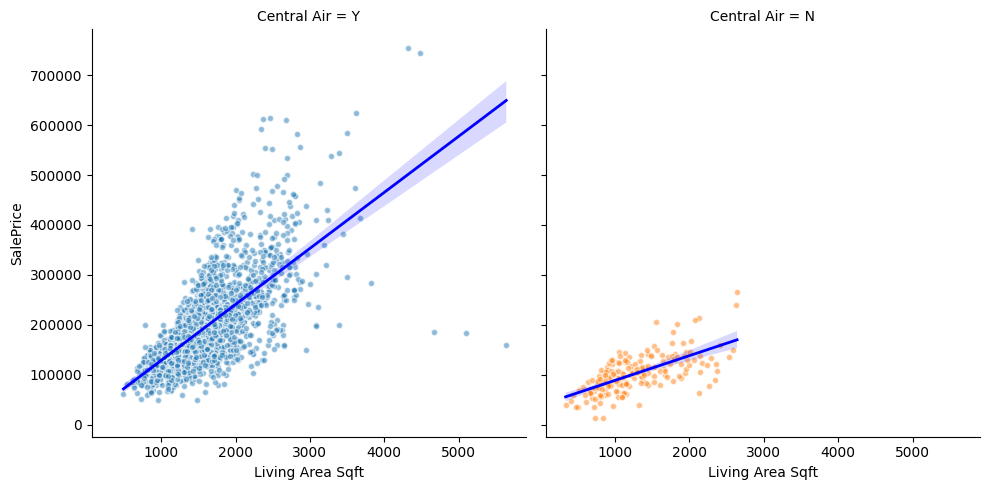

In [ ]:
line_kws = dict(color='b',linewidth=2)
g=sns.lmplot(data=df,x="Living Area Sqft",y="SalePrice",scatter_kws={"s":20,"edgecolor":"white" ,"alpha":0.5},col='Central Air',hue='Central Air',line_kws=line_kws)

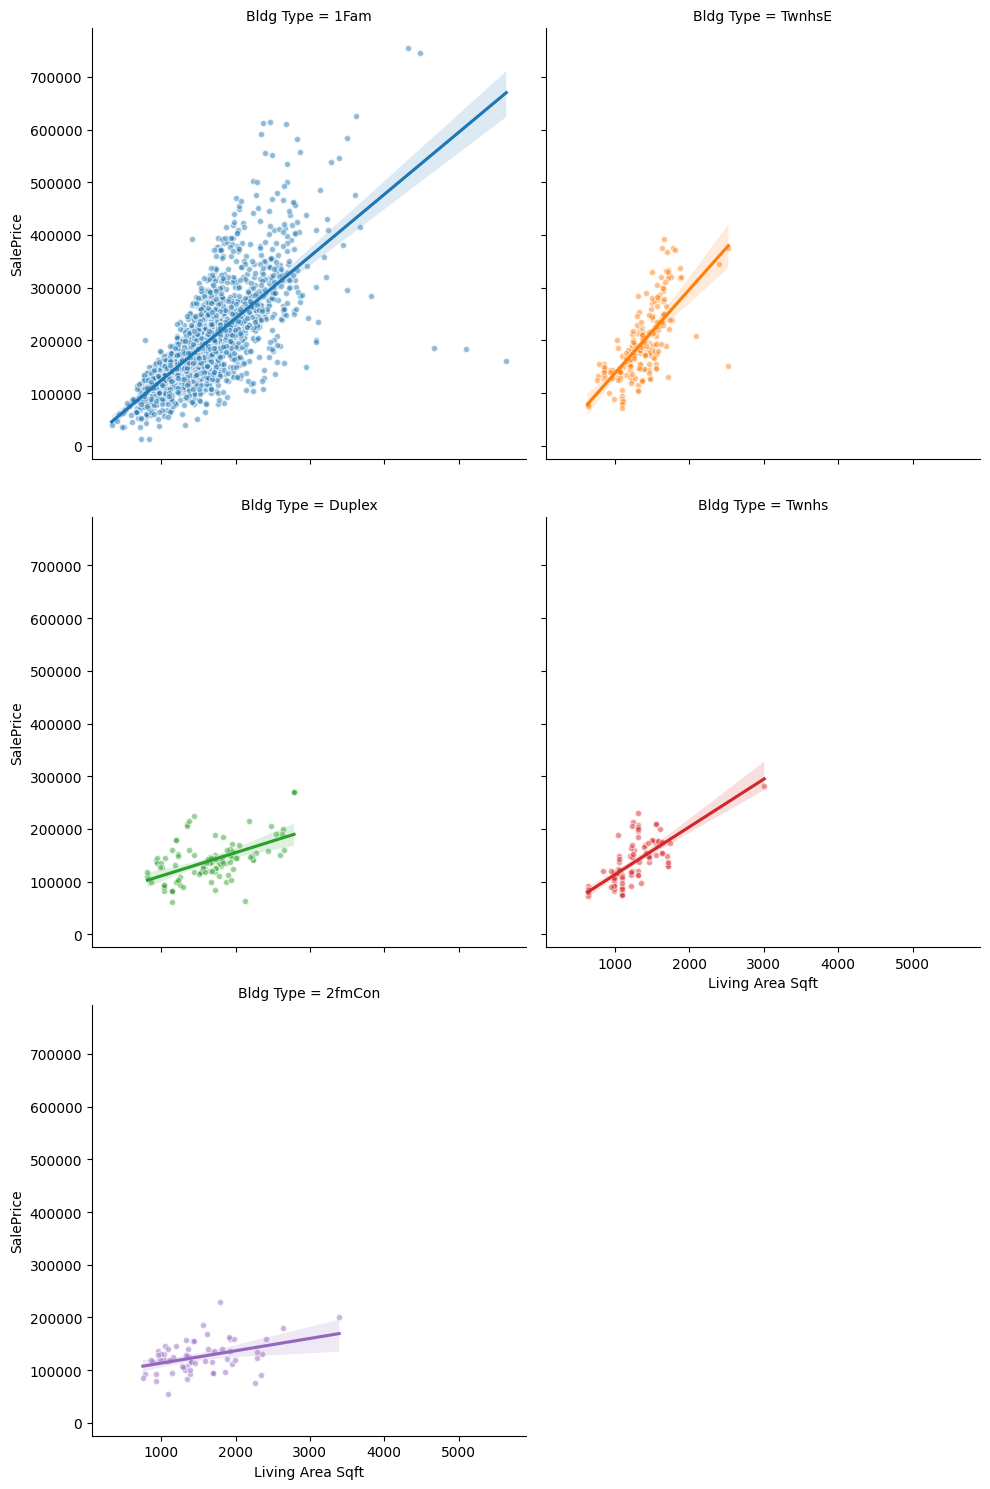

In [ ]:
# Demonstrating using col_wrap when the col column has many categories
g = sns.lmplot(data=df, x="Living Area Sqft", y="SalePrice",
               scatter_kws={"s":20,"edgecolor":"white" ,"alpha":0.5},
               hue='Bldg Type', aspect=1,
               col='Bldg Type',col_wrap =2 )    #عدد الكولووم في row



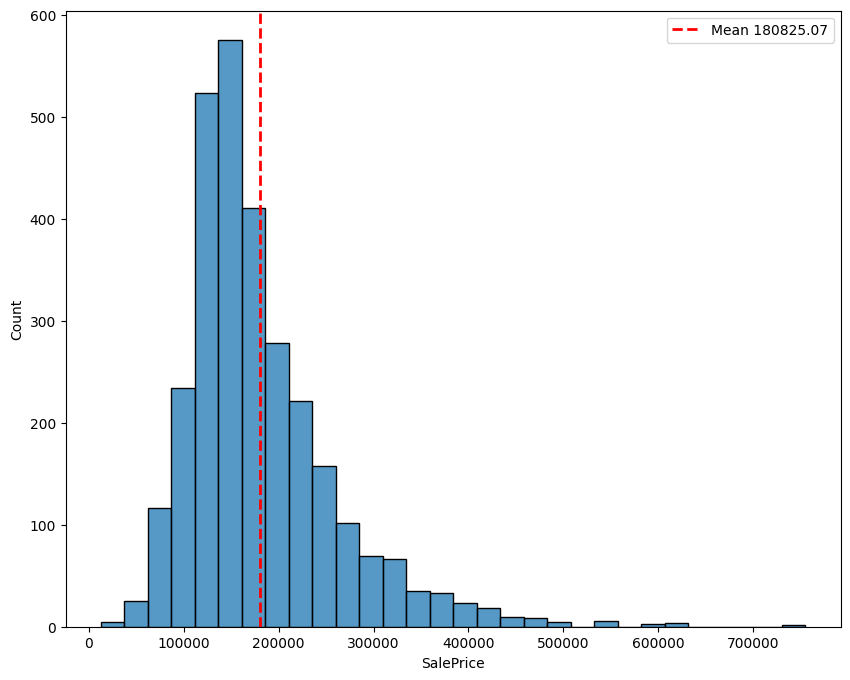

In [ ]:
mean=df['SalePrice'].mean().round(2)
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.histplot(data=df,x="SalePrice" ,bins=30)
ax.axvline(mean,color="r", label=f'Mean {mean}' ,lw=2,ls="--")
ax.legend();

In [ ]:
def plot_annotated_histogram(df, col):
     mean=df[col].mean().round(2)
     median=df[col].median().round(2)
     fig,ax=plt.subplots(figsize=(10,6))
     ax=sns.histplot(data=df,x=col,bins='auto')
     ax.set_title(f"number vs.{col}")
     ax.axvline(mean,color="k",ls="--",lw=2,label=f"mean:{mean}")
     ax.axvline(median,color="b",ls="-",lw=2,label=f"median:{median}")
     ax.ticklabel_format(style='plain')
     ax.tick_params(axis='x', rotation = 45);
     ax.legend()
     return fig, ax


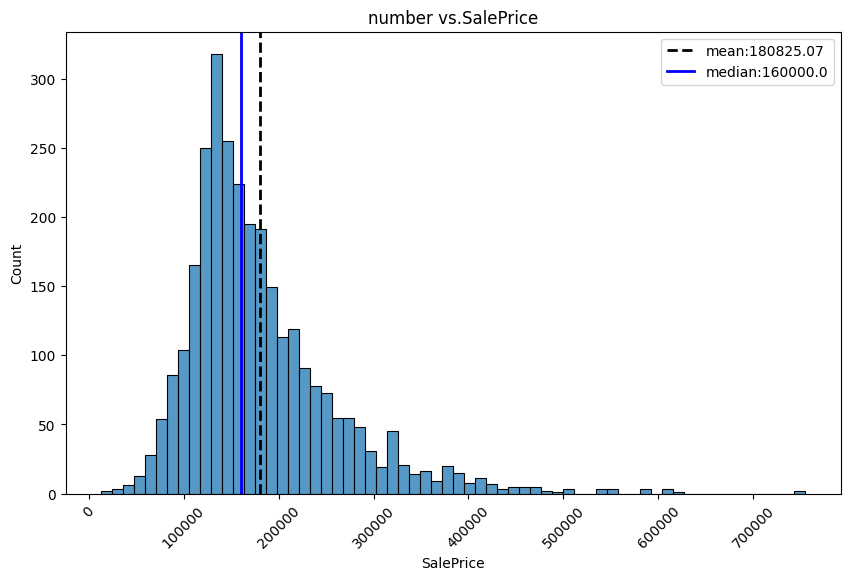

In [ ]:
fig,ax = plot_annotated_histogram(df, col = 'SalePrice')



### EDA

In [ ]:
temp_df=df.copy()
temp_df.isna().sum()

MS Zoning              0
Lot Frontage           0
Lot Area               0
Street                 0
Alley               2732
Utilities              0
Neighborhood           0
Bldg Type              0
House Style            0
Overall Qual           0
Overall Cond           0
Year Built             0
Year Remodeled         0
Exter Qual             0
Exter Cond             0
Bsmt Unf Sqft          1
Total Bsmnt Sqft       1
Central Air            0
Living Area Sqft       0
Bedroom                0
Kitchen                0
Total Rooms            0
Garage Type          157
Garage Yr Blt        160
Garage Cars            1
Garage Area            1
Garage Qual          159
Garage Cond          159
Paved Drive            0
Fence               2358
SalePrice              0
Month                  0
Year                   0
Total Full Baths       2
Total Half Baths       5
dtype: int64

In [ ]:
x="Alley"
placeholder='missing'
temp_df[x].isna().sum()
temp_df[x]=temp_df[x].fillna(placeholder)


<ipython-input-281-104bf6896917>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')


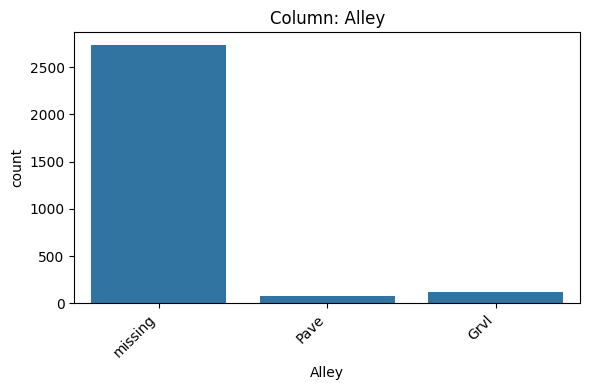

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
ax=sns.countplot(data=temp_df,x=x);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
ax.set_title(f"Column: {x}")
fig.tight_layout();

In [ ]:
def explore_categorical(df, x, placeholder = 'MG'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Fill in missing values with placeholder
  temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=(6,4))
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add. atitle with the feature name included
  ax.set_title(f"Column: {x}")
  fig.tight_layout()



<ipython-input-282-d15e3603cb95>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


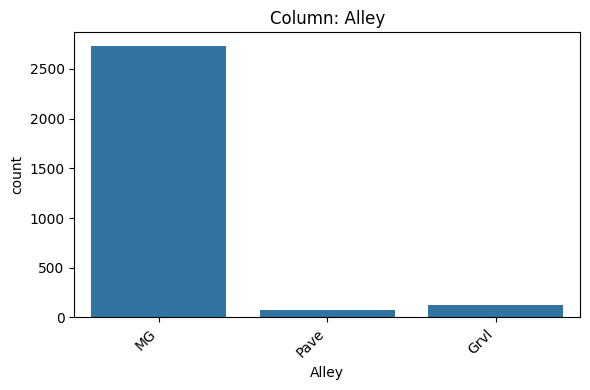

In [ ]:
# Test our function on Alley
explore_categorical(df, 'Alley');



In [ ]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



<ipython-input-284-404e555bd433>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


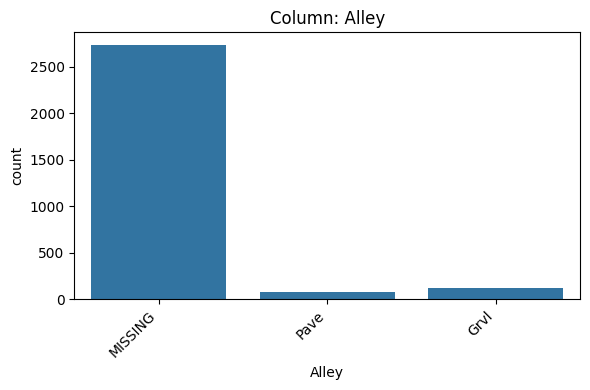

- NaN's Found: 2732 (93.24%)
- Unique Values: 3
- Most common value: 'MISSING' occurs 2732 times (93.24%)
- Not constant or quasi-constant.


In [ ]:
# Test our function with the print statements
explore_categorical(df, 'Alley');



In [ ]:
#cat
def cat_plot (df,x,placeholder= " missing",figsize=(6,4) , fillna=True ,order=None):
  temp_df=df.copy ()
  null_count = temp_df[x].isna().sum().round(2)
  parc_nul_value= null_count/len(temp_df)

  if fillna==True:
       temp_df[x]= temp_df[x].fillna(placeholder)
  fig,ax= plt.subplots(figsize=figsize)
  sns.countplot(data=temp_df, x=x ,ax=ax ,order=order )
  ax.set_xticklabels(ax.get_xticklabels(), rotation =45 , ha='right' )
  ax.set_title(f"of column {x}")
  fig.tight_layout()
  plt.show
  print(f'null value equal {null_count}, parcanteg null value {parc_nul_value}%')
  nunique=temp_df[x].nunique()
  print(f'nunique value {nunique}')
  val_counts=temp_df.value_counts()
  most_common_val = val_counts.index[0]

  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


  return fig , ax



null value equal 2732, parcanteg null value 0.9324232081911262%
nunique value 2
- Most common value: '('C (all)', 50, 8500, 'Pave', 'Pave', 'AllPub', 'IDOTRR', '1Fam', '2Story', 4, 4, 1920, 1950, 'TA', 'Fa', 649.0, 649.0, 'N', 1317.0, 3, 1, 6, 'Detchd', 1920.0, 1.0, 250.0, 'TA', 'Fa', 'N', 'MnPrv', 40000.0, '07', '2008', 1.0, 0.0)' occurs 1 times (0.03%)
- Not constant or quasi-constant.


<ipython-input-286-df3d0c591df1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation =45 , ha='right' )


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'of column Alley'}, xlabel='Alley', ylabel='count'>)

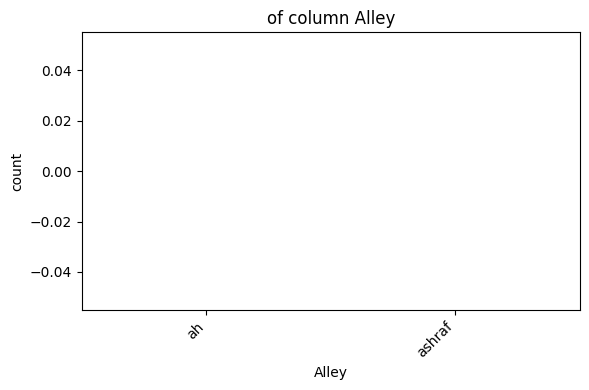

In [ ]:
cat_plot(df,x='Alley' , fillna=False , order=['ah', 'ashraf'])

In [ ]:
# Final version of function
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax




<ipython-input-288-293e1933b8bb>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


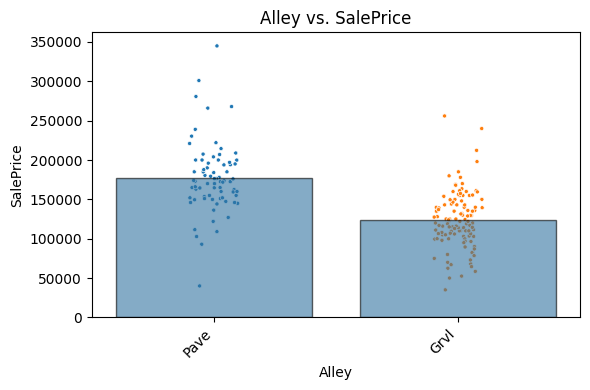

In [ ]:
fig,ax= plot_categorical_vs_target(df,x='Alley' ,fillna=False)

In [ ]:
def cat_target(df, x,y='SalePrice' ,figsize=(6,4),palceholder= 'Missing' ,fillna= True , order=None):
  temp_df= df.copy()
  if fillna==True:
   temp_df[x]=temp_df[x].fillna(placeholder)
  else:
    temp_df.dropna(subset=[x])


  fig,ax=plt.subplots(figsize=figsize)
  sns.barplot(data=temp_df, x=x , y=y ,ax=ax , edgecolor="white",linewidth= 1,alpha=0.5)
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  return fig , ax

(<Figure size 600x400 with 1 Axes>, <Axes: xlabel='Alley', ylabel='SalePrice'>)

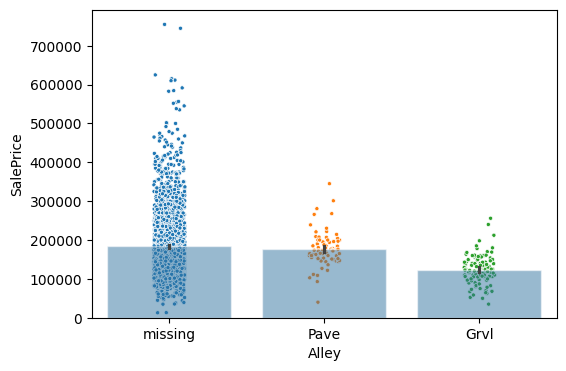

In [ ]:
cat_target(df,x='Alley' )

In [ ]:
#numarical part


def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}      #
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")



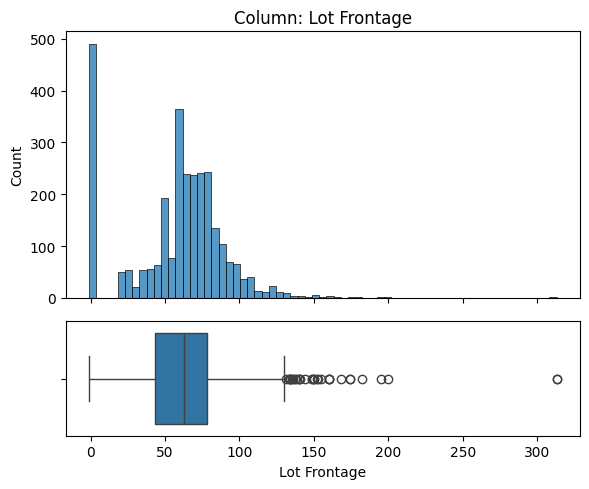

- NaN's Found: 0 (0.0%)


In [ ]:
# Test the function
explore_numeric(df, "Lot Frontage")



In [ ]:
# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function

def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax




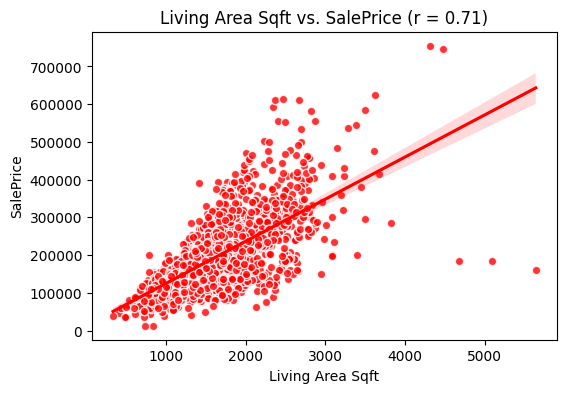

In [ ]:
# Test the function with Living Area Sqft
fig, ax = plot_numeric_vs_target(df, "Living Area Sqft" ,color = "red")    #  **kwargs >> color , truncate >> امتداد الخط



In [ ]:
def plot_numeric_vs_target(df, x, y='Overall', figsize=(6,4), **kwargs): # kwargs for sns.regplot
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    #fig, ax = plt.subplots(figsize=figsize)
    scatter_kws={'ec':'white','lw':1,'alpha':0.8}
    pp = sns.lmplot(data=df, x=x, y=y, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
    ## Add the title with the correlation
    pp.ax.set_title(f"{x} vs. {y} (r = {r})")
    # Make sure the plot is shown before the print statement
    plt.show()
    return pp.ax

## Sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
y=df['SalePrice']
X=df.drop(columns='SalePrice')


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
len(X_train)/len(df)*100  #done


74.98293515358363

### SimpleImputer

In [ ]:
nums_cols=X_train.select_dtypes("number").columns
impute_median =SimpleImputer(strategy="median")
impute_median .fit(X_train[nums_cols])

SimpleImputer(strategy='median')

In [ ]:
X_train_num_imputed=impute_median.transform(X_train[nums_cols])      #imputer number columns
X_test_num_imputed=impute_median.transform(X_test[nums_cols])

In [ ]:
cat_cols=X_train.select_dtypes("object").columns
imputer_na=SimpleImputer(strategy="constant" , fill_value="NA")
imputer_na.fit(X_train[cat_cols])


SimpleImputer(fill_value='NA', strategy='constant')

In [ ]:
X_train_cat_imputed=imputer_na.transform(X_train[cat_cols])
X_test_cat_imputed=imputer_na.transform(X_test[cat_cols])
X_test_cat_imputed.isna().sum()

MS Zoning       0
Street          0
Alley           0
Utilities       0
Neighborhood    0
Bldg Type       0
House Style     0
Exter Qual      0
Exter Cond      0
Central Air     0
Garage Type     0
Garage Qual     0
Garage Cond     0
Paved Drive     0
Fence           0
Month           0
Year            0
dtype: int64

### OrdinalEncoder , OneHotEncoder

In [ ]:
 # OrdinalEncoder
# define a list of columns to encode as ordinal
ordinal_cols = ['Exter Qual', 'Garage Qual', 'Exter Cond', 'Garage Cond']






In [ ]:
# Specifying the order of categories in quality/condition columns
qual_cond_order = ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order, qual_cond_order, qual_cond_order, qual_cond_order]

# Instantiate the encoder and include the list of ordered values as an argument
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)




In [ ]:
# Fit the encoder on the training data
ord_encoder.fit(X_train_cat_imputed[ordinal_cols])
# Transform the training data
X_train_ordinal_enc = ord_encoder.transform(X_train_cat_imputed[ordinal_cols])

# Transform the test data
X_test_ordinal_enc = ord_encoder.transform(X_test_cat_imputed[ordinal_cols])

X_train_ordinal_enc.value_counts()


Exter Qual  Garage Qual  Exter Cond  Garage Cond
3.0         3.0          3.0         3.0            959
4.0         3.0          3.0         3.0            655
3.0         3.0          4.0         3.0            137
            0.0          3.0         0.0             85
5.0         3.0          3.0         3.0             78
4.0         3.0          4.0         3.0             51
3.0         2.0          3.0         3.0             42
                                     2.0             27
            3.0          3.0         2.0             18
                         2.0         3.0             18
            0.0          4.0         0.0             11
            2.0          4.0         3.0             10
2.0         0.0          2.0         0.0              9
            3.0          3.0         3.0              7
3.0         0.0          2.0         0.0              7
4.0         4.0          3.0         3.0              5
3.0         3.0          5.0         3.0              4

In [ ]:
# saving list of categorical features to one-hot-encode
ohe_cols = X_train_cat_imputed.drop(columns=ordinal_cols).columns
# Instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


# Fit the OneHotEncoder on the training data
ohe_encoder.fit(X_train_cat_imputed[ohe_cols])




OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
# Transform the training data
X_train_cat_ohe = ohe_encoder.transform(X_train_cat_imputed[ohe_cols])
X_train_cat_ohe



,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Utilities_AllPub,Utilities_NoSewr,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,Month_01,Month_02,Month_03,Month_04,Month_05,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
905475520,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
909254010,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
531450090,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
903400040,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
527107130,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527402220,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.

In [ ]:
# Transform the testing data
X_test_cat_ohe = ohe_encoder.transform(X_test_cat_imputed[ohe_cols])
X_test_cat_ohe



,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Utilities_AllPub,Utilities_NoSewr,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,Month_01,Month_02,Month_03,Month_04,Month_05,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
535477060,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
535302140,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
907290090,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
528138030,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
908275280,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908152080,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.

### StandardScaler

In [ ]:
set_config(transform_output='pandas')
# Previewing our data
X_train_num_imputed.head()

# Obtain summary statistics for training data
X_train_num_imputed.describe().round(2)



,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remodeled,Bsmt Unf Sqft,Total Bsmnt Sqft,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Yr Blt,Garage Cars,Garage Area,Total Full Baths,Total Half Baths
count,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00,2197.00
mean,57.39,10051.87,6.07,5.56,1970.88,1984.06,559.18,1048.32,1495.06,2.85,1.04,6.43,1978.05,1.76,470.32,1.98,0.43
std,33.61,7006.81,1.43,1.11,30.42,21.03,436.22,450.04,508.24,0.83,0.21,1.58,24.46,0.77,218.33,0.76,0.54
min,-1.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,334.00,0.00,0.00,2.00,1895.00,0.00,0.00,1.00,0.00
25%,43.00,7425.00,5.00,5.00,1953.00,1964.00,222.00,784.00,1120.00,2.00,1.00,5.00,1961.00,1.00,312.00,1.00,0.00
50%,63.00,9405.00,6.00,5.00,1972.00,1993.00,467.00,982.00,1440.00,3.00,1.00,6.00,1979.00,2.00,474.00,2.00,0.00
75%,78.00,11600.00,7.00,6.00,2001.00,2004.00,798.00,1288.00,1734.00,3.00,1.00,7.00,2001.00,2.00,576.00,2.00,1.00
max,313.00,164660.00,10.00,9.00,2010.00,2010.00,2336.00,6110.00,5642.00,6.00,3.00,15.00,2010.00,5.00,1488.00,6.00,3.00
